# 🐍.4 Intro to Regression in Pandas

### Nate & Tyler


<img src="https://www.explainxkcd.com/wiki/images/9/91/linear_regression.png" width="400px"/>
<br>
Why Regression?
Regression is going to be our first foray into `machine learning`, or statstics, or econometrics depending on your point of view. This lesson will approach the theory and motivations behind simple linear regression.

*So what is regression?* <br>
>A statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables:

>One variable, denoted x, is regarded as the predictor, explanatory, or independent variable.
 The other variable, denoted y, is regarded as the response, outcome, or dependent variable.
 
With regression, we can distill the relationship between two variables into a single parameter or set of parameters. This can be useful for:
- Inference: can we quantitatively show a relationship between the two variables? How strong is this relationship?
- Prediction: can we anticipate the values of our dependent variable based on the values of our independent variable(s)

In [16]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
sys.path.append('../../custom')

from db_utils import get_connection, validate_connection, get_data
pd.options.display.float_format = '{:,.2f}'.format

### Motivating Question?
Let's pretend we're admissions counselors and we'd like to admit college student that are going to be successful. How might we determine that? 
> Let's assume we can use SAT scores to predict college GPA potential.

Our Hypothesis is that students with higher SAT scores will perform better in college and have higher GPAs. Let's test this by graphing it!

In [4]:
data = pd.read_csv('sat_data.csv')
data.head()

,high_GPA,math_SAT,verb_SAT,comp_GPA,univ_GPA
0,3.45,643,589,3.76,3.52
1,2.78,558,512,2.87,2.91
2,2.52,583,503,2.54,2.40
3,3.67,685,602,3.83,3.47
4,3.24,592,538,3.29,3.47


Text(0, 0.5, 'University GPA')

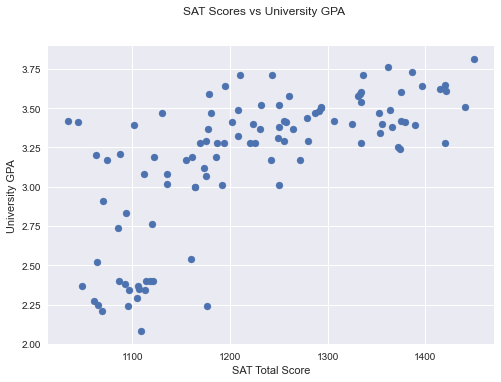

In [91]:
fig = plt.figure()
plt.scatter(data.math_SAT + data.verb_SAT, data.univ_GPA)
fig.suptitle('SAT Scores vs University GPA')
plt.xlabel('SAT Total Score')
plt.ylabel('University GPA')

We can see from the above graph that there is a general trend. It appears that people with higher SAT scores generally get better GPAs in college.

But now we want to quantify this in a relational format. By increasing SAT score by x-points, how much might this be expected to increase university GPA?

### Enter : Our formula for a linear equation!
Most of you might recall from algebra, our equation for a linear equation expressed below. <br><br>
\begin{equation}
Y = m x + b
\end{equation}
<br>
We'll want to express that here where Y is our dependent variable (University GPA), x is our independent variable (SAT total Score), and m is a scalar value that we'll use to define the relationship between the two of them.

To build a `Linear Regression` using these variables we'll want to draw a line through our data such that we have an
initial intercept (b) and the slope of our line relates our observed values of X and Y.

To do this we're going to refactor our above equation a little bit and write it in a clearer format for understanding how they are related, such that Y is a function of random variable X. 
<br><br>
\begin{equation}
Y_i = f(X) = \beta_0 + \beta_1 X_i + \epsilon_i
\end{equation}
<br><br>
In this equation our intercept is equal to Beta-zero, Beta-one is our scalar value (same as m in equation above) and epsilon is going to model our error, or residuals.


> Can anyone tell us why we have subscripts for beta and x?

So what does epsilon mean? Remember we're planning on drawing a line of best fit through our data. For each X value, epsilon is going to represent the error of our fit (the distance from the actual observed value to our predicted line)

<img src="https://files.realpython.com/media/fig-lin-reg.a506035b654a.png" width="600">

# Let's build a Regression Model

### Creating a Loss Function

In [96]:
def loss_function(predicted_values: np.array, expected_values: np.array) -> float:
    '''
    loss_function takes two arrays of equal length as inputs, predicted x values and expected y values.
    Using this two arrays we determine the Mean Squared Error associated with the predicted Xs.
    '''
    epsilon = 0
    for x,y in zip(predicted_values, expected_values):
        epsilon += (x - y)**2
    return epsilon/predicted_values.size

### Let's do a hand-calculated example to understand loss.

Looking at the graph above let's come up with some estimates for a slope and intercept to input into our formula.
I'm going to regraph our formula here so we can better see the full axis

(0.0, 4.0)

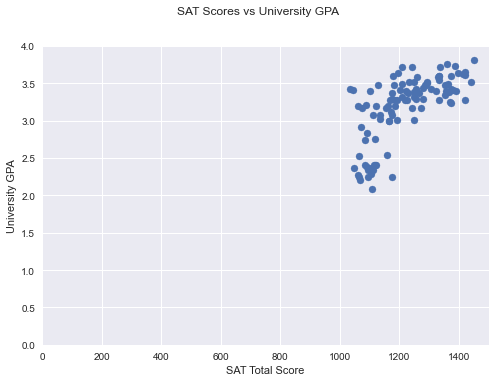

In [44]:
fig = plt.figure()
plt.scatter(data.math_SAT + data.verb_SAT, data.univ_GPA)
fig.suptitle('SAT Scores vs University GPA')
plt.xlabel('SAT Total Score')
plt.ylabel('University GPA')
plt.xlim(0,1500)
plt.ylim(0,4)

In [105]:

beta_zero = 1
beta_one = 0.0015

def calc_predicted_values(beta_zero :float, beta_one : float, X : np.array) -> np.array:
    '''
    Calculation takes an intercept and slope value and returns an array of predicted Y values.
    '''
    y = beta_zero + (beta_one * X)
    return y

In [106]:
predictions = calc_predicted_values(beta_zero, beta_one, data.math_SAT + data.verb_SAT)

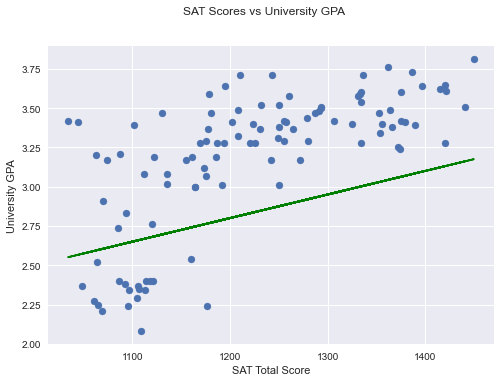

In [107]:
# Let's plot this against our current data to see how it looks

fig = plt.figure()
plt.scatter(data.math_SAT + data.verb_SAT, data.univ_GPA)
fig.suptitle('SAT Scores vs University GPA')
plt.xlabel('SAT Total Score')
plt.ylabel('University GPA')
plt.plot(data.math_SAT + data.verb_SAT, predictions, color='green', label="hand-fit")

In [108]:
# Now we want to understand the mean squared error using our function above.
# We can pass our predicted values array and the actual values to determine the average value of epsilon

SSE = loss_function(data.univ_GPA, predictions)
print('Total MSE is: %f' %(SSE))

Total MSE is: 0.240032


> Can we describe what this might mean logically?

## Great, but now let's Optimize!
The `machine learning` portion of linear regression is solving for the best fit of this line, we do this by reducing the sum squared error, or the loss function as we've defined it, we need to fine the line where this SSE or epsilon in this case is the minimum possible value we can find. 

Rather than diving into the math behind this solve, we're going to introduce some easy tools you can use to resolve this yourself.

In [109]:
# Import the sklearn module and associated information we'll need
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [110]:
# Initialize a Linear Regression object
regr = linear_model.LinearRegression()
X = data.math_SAT + data.verb_SAT
Y = data.univ_GPA

regr.fit(X.values.reshape(-1,1), Y)
print('Calculated Intercept: %s' %regr.intercept_)
print('Calculated Beta_one Coefficient: %s' %(regr.coef_[0]))


Calculated Intercept: -0.17160550976942712
Calculated Beta_one Coefficient: 0.00273760156635528


In [111]:
final_predictions = calc_predicted_values(regr.intercept_, regr.coef_[0], X)

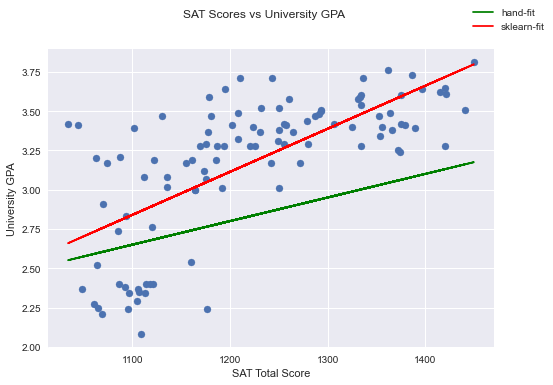

In [114]:
# Let's plot this against our current data to see how it looks

fig = plt.figure()
plt.scatter(data.math_SAT + data.verb_SAT, data.univ_GPA)
fig.suptitle('SAT Scores vs University GPA')
plt.xlabel('SAT Total Score')
plt.ylabel('University GPA')
plt.plot(X, predictions, color='green', label="hand-fit")
plt.plot(X, final_predictions, color='red', label="sklearn-fit")
fig.legend()

In [115]:
# Now let's see how this error stacks up against our MSE
mse_sklearn = mean_squared_error(final_predictions, Y)

In [117]:
print('sklearn Mean Squared Error: %f' %(mse_sklearn))

sklearn Mean Squared Error: 0.105222


In [ ]:
# Let's understand what the R2 value is behind this calculation
r2_score